
Call:
svm(formula = satisfaction ~ ., data = Appren)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  1919



Warning message in dist(data[, -5]):
“NAs introduced by coercion”



Accuracy: 93.48 %
Time: 2025-04-29 11:37:16 


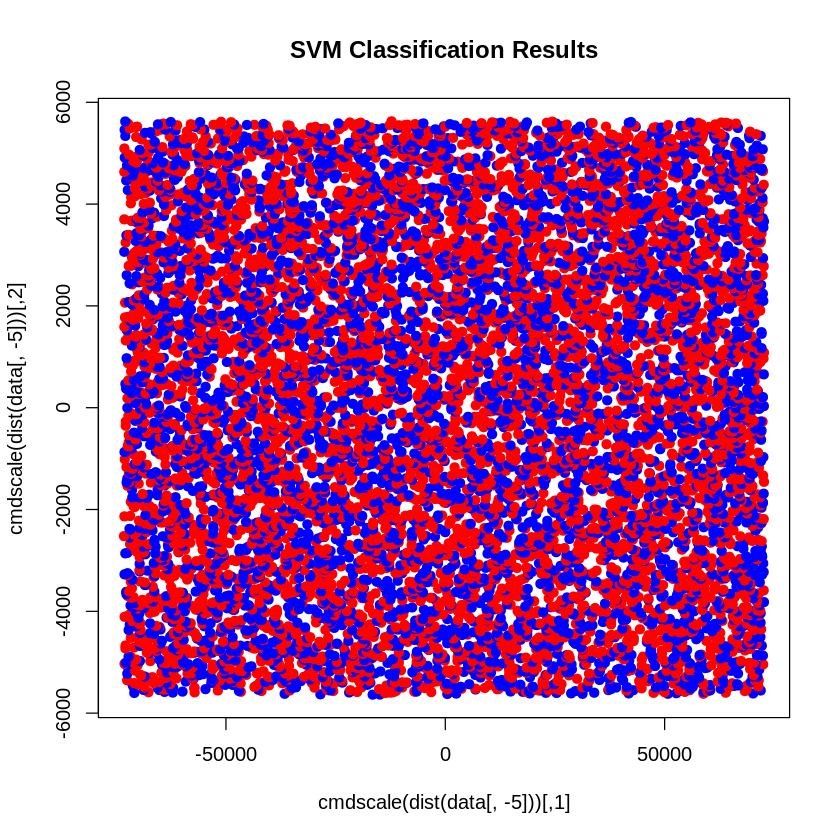

In [ ]:
install.packages("e1071")
library(stats)
library(e1071)
test <- read.csv("test.csv")
data <- test[1:10000, ]
data <- na.omit(data)
data[sapply(data, is.character)] <- lapply(data[sapply(data, is.character)], as.factor)
set.seed(123)
n <- nrow(data)
index <- sample(n, size = 0.7 * n)
Appren <- data[index, ]
Test <- data[-index, ]
model <- svm(satisfaction ~ ., data = Appren)
print(model)
colors <- c("red", "blue")
if (ncol(data) >= 5) {
  plot(
    cmdscale(dist(data[,-5])),
    col = colors[as.integer(data$satisfaction)],
    pch = 19,
    main = "SVM Classification Results")}
Pred <- predict(model, newdata = Test)
Test.mod <- cbind(Test, Pred)
Confusion <- table(Actual = Test.mod$satisfaction, Predicted = Test.mod$Pred)
accuracy <- sum(diag(Confusion)) / sum(Confusion)
cat("\nAccuracy:", round(accuracy * 100, 2), "%\n")
time1 <- Sys.time()
cat("Time:", format(time1, "%Y-%m-%d %H:%M:%S"), "\n")
